In [1]:
# Load the datasets json

import json
import os

# Get all json files in the liref-check directory
liref_check_dir = "../../../outputs/liref-check"
json_files = [f for f in os.listdir(liref_check_dir) if f.endswith('symbolic.json')]

# Load each json file into a dictionary with the filename as key
datasets = {}
for json_file in json_files:
    file_path = os.path.join(liref_check_dir, json_file)
    with open(file_path, 'r') as f:
        datasets[json_file] = json.load(f)

print(datasets.keys())


In [5]:
import re

results_dict = {}
for key in datasets.keys():
    correct = 0
    incorrect = 0
    dataset = datasets[key]
    if key not in results_dict:
        results_dict[key] = 0
    for i in range(len(dataset)):
        text = dataset[i]['solution']
        pattern = "Let's think step by step"

        # Find all occurrences of the pattern
        occurrences = [m.start() for m in re.finditer(pattern, text)]

        # Get the ninth occurrence if it exists
        ninth_idx = occurrences[8] if len(occurrences) >= 9 else -1

        #print(ninth_idx)
        if ninth_idx != -1:
            solution_after_prompt = text[ninth_idx:]
            #print(solution_after_prompt)
            match = re.search(r"(\d+\.?\d*)(?!.*\d)", solution_after_prompt)
            if match:
                #print(float(match.group(1)))
                if float(match.group(1)) == dataset[i]['final_answer']:
                    results_dict[key] += 1
                else:
                    incorrect += 1

    print("Accuracy of GSM-symbolic for dataset: ", key, "is: ", results_dict[key] / 200)
        
            


Accuracy of GSM-symbolic for dataset:  0.1-liref_gsm_symbolic.json is:  0.58
Accuracy of GSM-symbolic for dataset:  0.0-liref_gsm_symbolic.json is:  0.66
Accuracy of GSM-symbolic for dataset:  -0.05-liref_gsm_symbolic.json is:  0.71
Accuracy of GSM-symbolic for dataset:  -0.1-liref_gsm_symbolic.json is:  0.675
Accuracy of GSM-symbolic for dataset:  0.05-liref_gsm_symbolic.json is:  0.625


Text(0, 0.5, 'Accuracy')

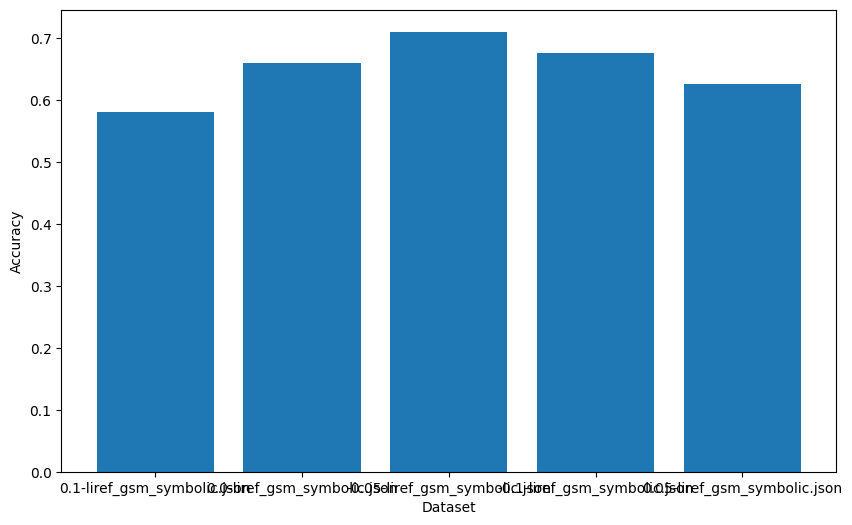

In [6]:
# Plot the accuracy of the GSM-symbolic for each dataset

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(datasets.keys(), [results_dict[key] / 200 for key in datasets.keys()])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')